<a href="https://colab.research.google.com/github/KalebAvila/ProyectoConjunto_KAAvila_MAMurguia/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:** Kaleb Azael Avila Padilla, Manuel Aalejandro Murguia Orantes

**Fecha:** 5 de Marzo de 2024.

**Expediente** : 724405, 739360
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/KalebAvila/ProyectoConjunto_KAAvila_MAMurguia

# Tarea 4: Clase 11

# <font color='red'> Tarea: </font>

Terminar los demás numerales faltantes de este ejercicio.

Código de solución estudiante 1

2. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.

In [1]:
# Código de solución estudiante 1
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()
train_data.shape, test_data.shape
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)

In [2]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,9.71,26.7


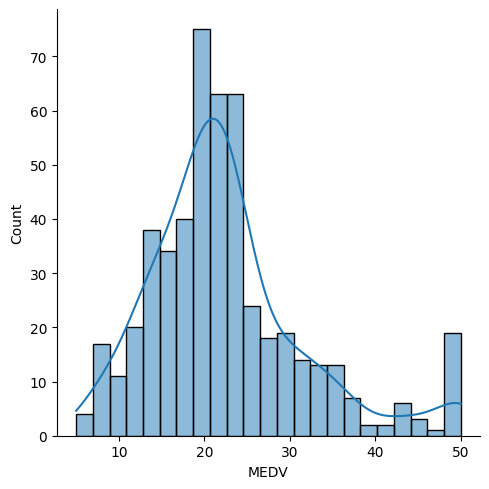

In [3]:
# Graficar la distribución de la salida (precios de viviendas) sn.distplot -> kde
sn.displot(data, x='MEDV', kde=True)

<Axes: >

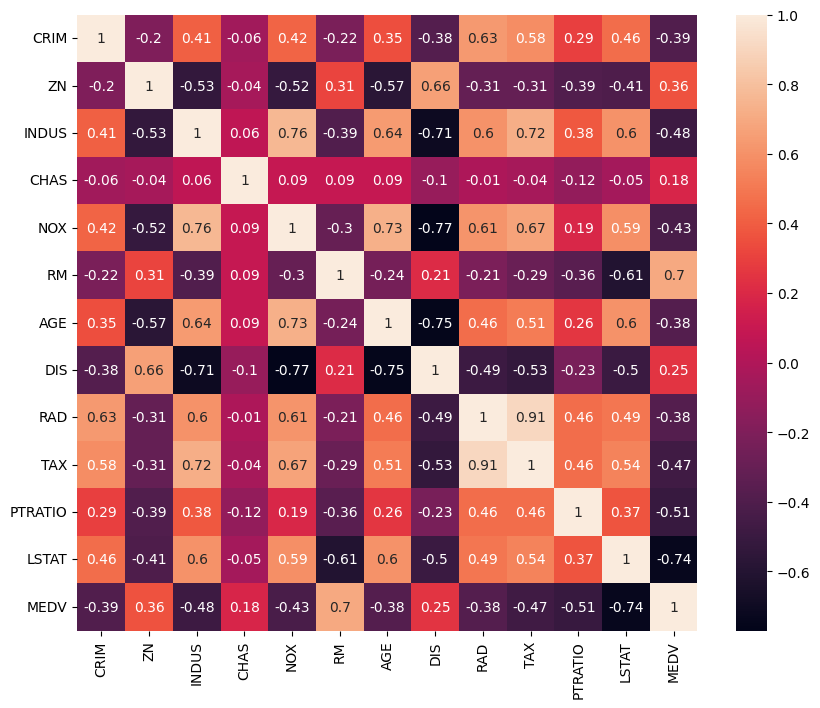

In [4]:
# Análisis de correlación (selección de features) heatmap -> annot
corr = data.corr().round(2)

fig, ax = plt.subplots(1,1, figsize=(10, 8))
sn.heatmap(corr, annot=True, ax=ax)

<Axes: xlabel='CRIM', ylabel='MEDV'>

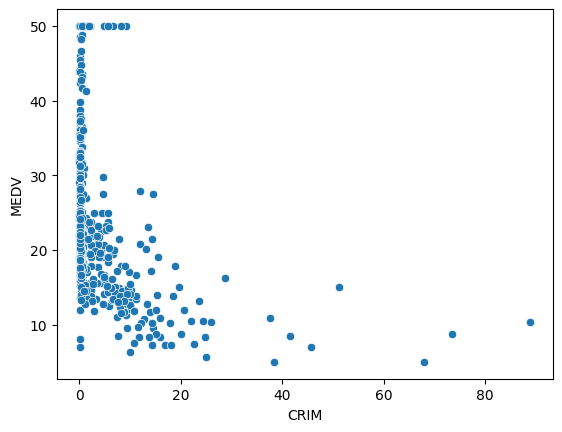

In [5]:
output_col = ['MEDV']
features_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
sn.scatterplot(data, x=features_cols[0], y=output_col[0])

<Axes: >

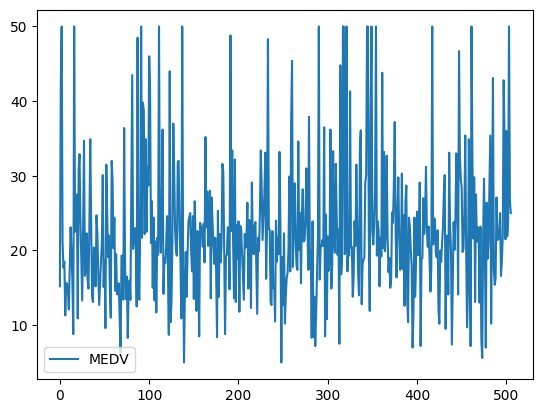

In [6]:
# Graficar la salida en el tiempo
data[output_col].plot()

<Axes: >

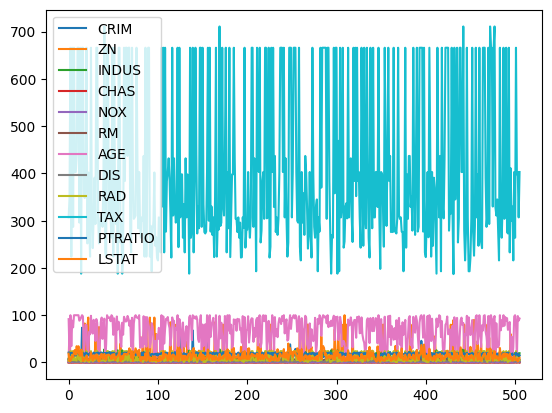

In [7]:
# Gráfica de las características en el tiempo
data[features_cols].plot()

In [8]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [9]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

(466, 13)
(404, 13)


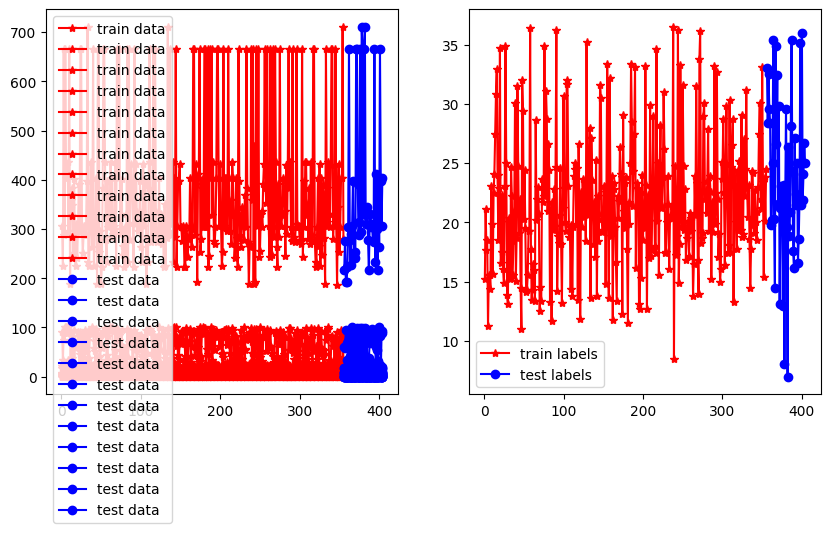

In [10]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.3 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data, 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data, 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')
plt.legend()

In [11]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [12]:
# Poner una semilla para replicar resultados
tf.random.set_seed(1234)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
test_data.shape

(49, 12)

In [14]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=50,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 5ms/step - loss: 18.7080 - mae: 2.7600
Error cuadrático medio en el conjunto de prueba: 18.707958221435547
Error absoluto medio en el conjunto de prueba: 2.760011672973633


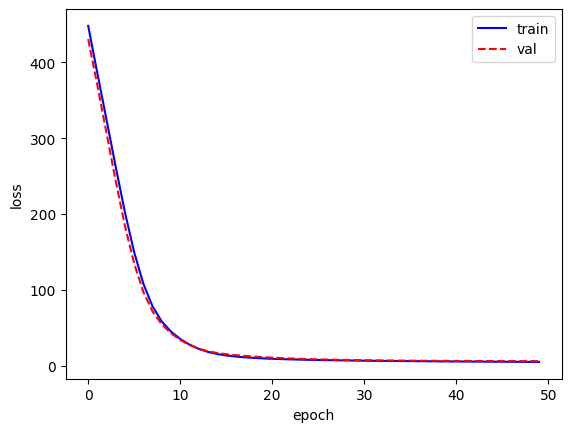

In [15]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

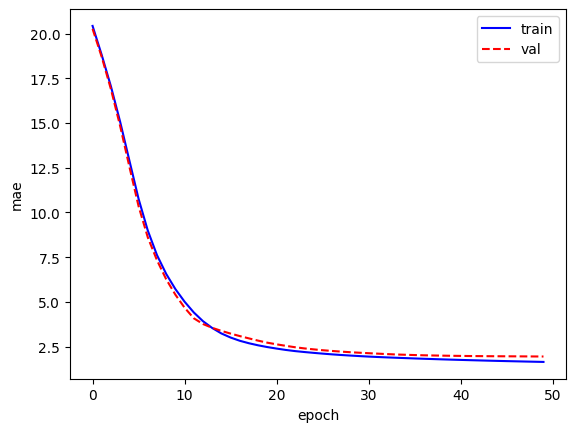

In [16]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

2/2 [==============================] - 0s 3ms/step


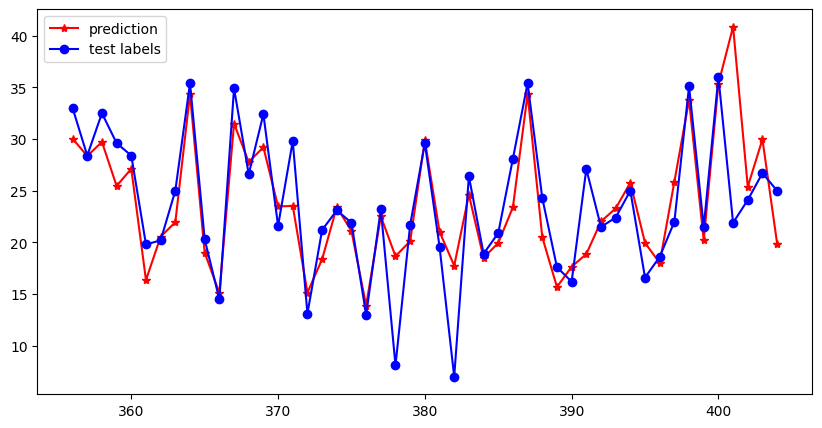

In [17]:
predicted = model.predict(test_data)
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()

3. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

<Axes: >

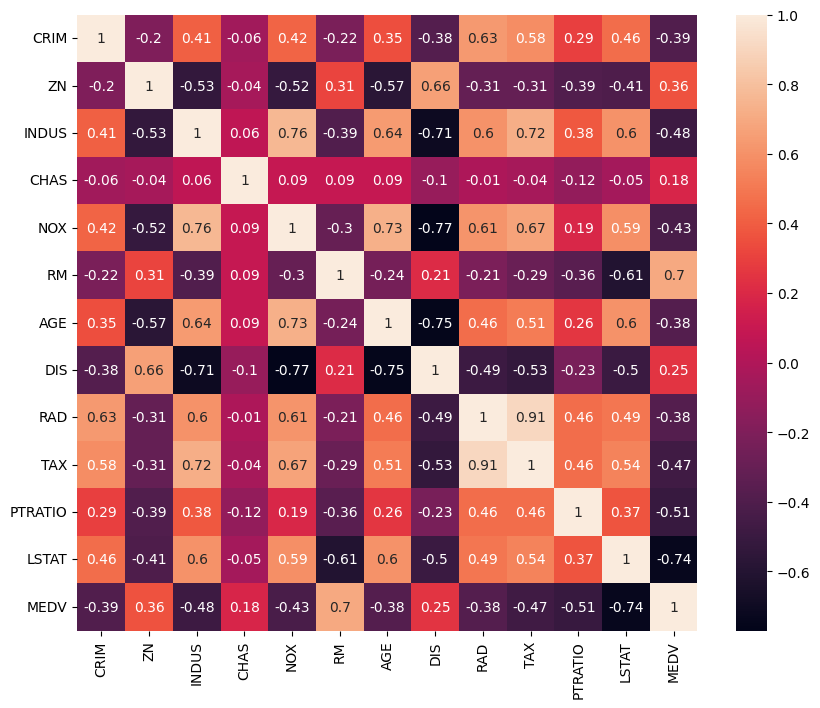

In [18]:
# Análisis de correlación (selección de features) heatmap -> annot
corr = data.corr().round(2)

fig, ax = plt.subplots(1,1, figsize=(10, 8))
sn.heatmap(corr, annot=True, ax=ax)

Vamos a ver con la correlación de pearson cuales variables pueden ser las mas importantes, como en clase se ve que RM es una de las más importantes pero debemos usar más, por lo que tomare tambien ZN y DIS que son Zone y Distance.

<Axes: xlabel='ZN', ylabel='MEDV'>

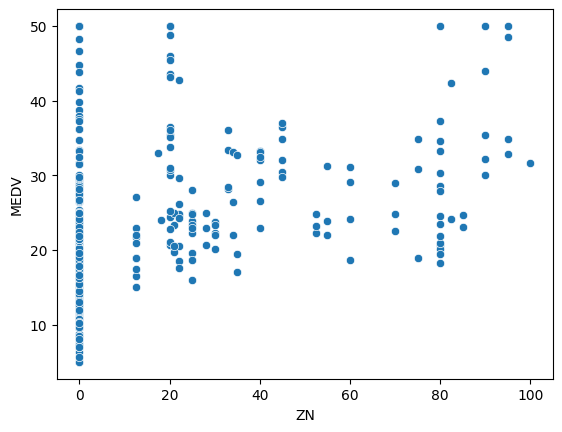

In [19]:
output_col = ['MEDV']
features_cols = ['ZN', 'DIS', 'RM']
sn.scatterplot(data, x=features_cols[0], y=output_col[0])

<Axes: >

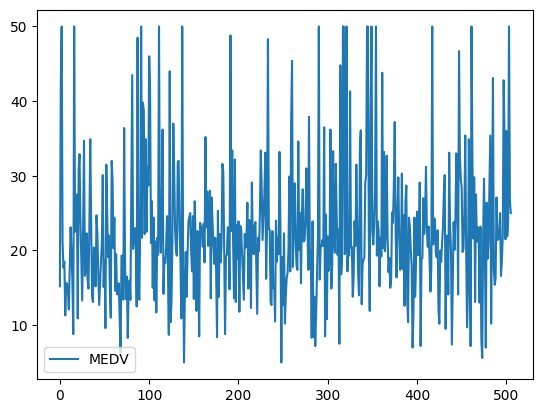

In [20]:
# Graficar la salida en el tiempo
data[output_col].plot()

<Axes: >

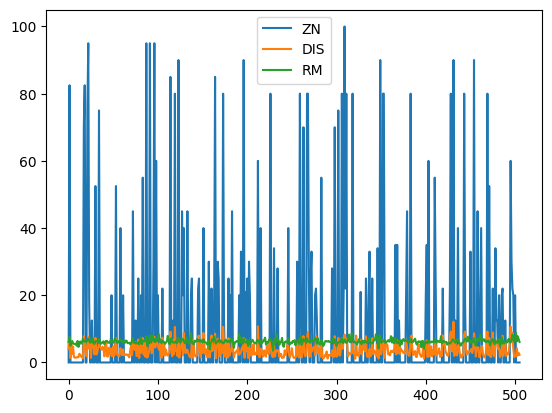

In [21]:
# Gráfica de las características en el tiempo
data[features_cols].plot()

In [22]:
data['log_rm'] = np.log(data['RM'])
data['log_medv'] = np.log(data['MEDV'])
data['log_zn'] = np.log(data['ZN'])
data['log_dis'] = np.log(data['DIS'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

(466, 4)
(406, 4)


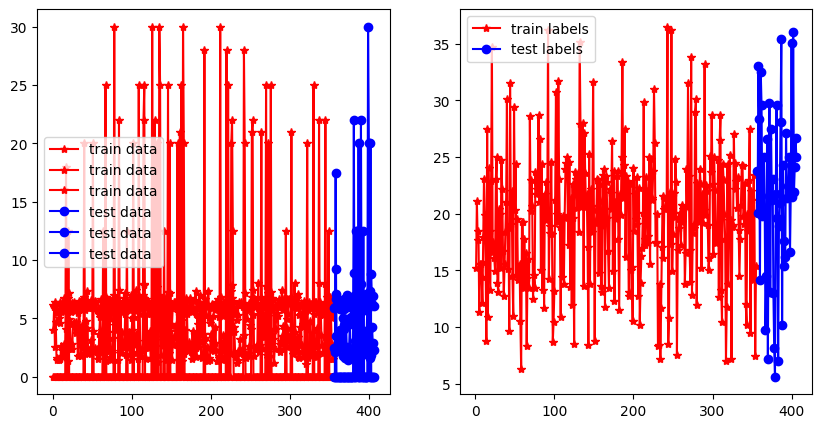

In [25]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.3 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data2, test_data2 = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels2, test_labels2 = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data2, 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data2, 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels2, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels2, 'bo-', label='test labels')
plt.legend()

In [26]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data2.mean(axis=0)
std = train_data2.std(axis=0)
train_data2 = (train_data2 - mean) / std
test_data2 = (test_data2 - mean) / std

In [27]:
# Poner una semilla para replicar resultados
tf.random.set_seed(4321)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data2.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                256       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
print(test_data.shape)
print(train_data.shape)

(49, 12)
(355, 12)


In [30]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data2, train_labels2,
    validation_split=0.2,
    shuffle=False,
    epochs=50,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data2, test_labels2)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 5ms/step - loss: 29.6689 - mae: 4.4894
Error cuadrático medio en el conjunto de prueba: 29.668888092041016
Error absoluto medio en el conjunto de prueba: 4.489353656768799


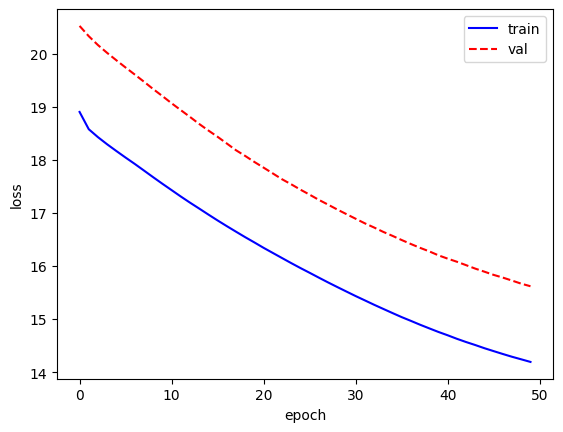

In [31]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

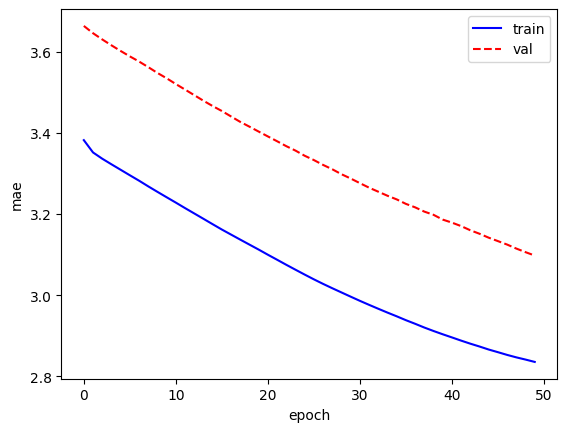

In [32]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

2/2 [==============================] - 0s 4ms/step


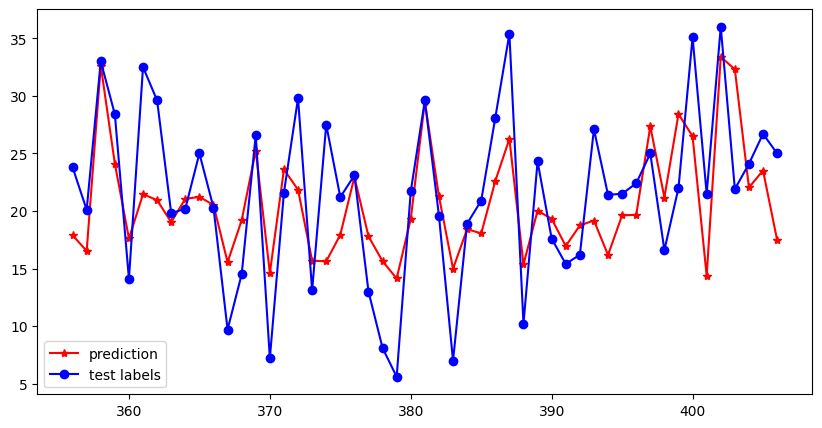

In [35]:
predicted = model.predict(test_data2)
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels2, 'bo-', label='test labels')

plt.legend()

Despues de hacer los dos medelos faltantes agarrando todas las variables y las que yo creí mejores pude llegar a la conclusión de que el modelo fue mejor con todas las variables, esto puede ser que al ser precios de viviendas el tener más información en general puede dar un mejor modelo, aunque muchas veces uno nunca sabe como se puede mover el mercado inmobiliaro.

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........